# Application Reinforcement Learning Algorithms

In this file we'll apply three of the main algorithms of ___Reinforcement Learning___ (___Sarsa___, ___Expected Sarsa___ and ___Q-Laearning___) in an _episodic case_. It's represented by an agent inside of a maze (environment). An agent starting from an initial position (starting state) by choosing actions of movement or none and receiving rewards from the environment, it will learn to reach the goal position (goal state).

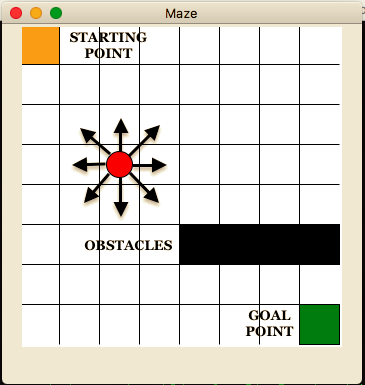

In [1]:
from IPython.display import Image
Image(filename='Agent_in_Maze.png') 

## 1) Definition of agents and environment

In [2]:
# Import packages
from MazeEnvironment import MazeEnvironment
from MazeAgents import MazeSarsaAgent, MazeExpSarsaAgent, MazeQAgent
from InteractionAgentEnvironment import RLInteraction
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Create a maze-environment
height, width = 8, 8
num_states = height*width
env_info = {'height':height, 'width':width, 'start_loc':(0,0),'goal_loc':(7,7), 'obstacles':[(4,5),(5,5),(6,5),(7,5)], 'time_sleep':.0001}
env = MazeEnvironment(env_info)

In [4]:
# Create three agents, each one using different learning algorithm
num_actions = 9
agent_info = {'num_states':num_states, 'num_actions':num_actions, 'epsilon':.1, 'alpha':.4, 'gamma':0.99}
sarsaAgent = MazeSarsaAgent(agent_info)
expSarsaAgent = MazeExpSarsaAgent(agent_info)
qAgent = MazeQAgent(agent_info)

## 2) Training of agents by interacting with environment

In [5]:
# Create an istance of the class RLInteraction for sarsa-agent
rl_simulation = RLInteraction()

In [6]:
# Define the number of episodes
num_episodes = 100

In [7]:
# run a training-experiment for the Sarsa agent
rl_simulation.run_experiment(sarsaAgent, env, num_episodes)

Episode 100/100 || best return: -11.0
Episodes 100/100 completed with success.

In [8]:
# save results
sum_rewards_sarsa = rl_simulation.sum_rewards_episodes.copy()

In [9]:
# clean data inside of rl_simulation
rl_simulation.cleanup()

In [10]:
# run a training-experiment for the Expected Sarsa agent
rl_simulation.run_experiment(expSarsaAgent, env, num_episodes)

Episode 100/100 || best return: -8.00
Episodes 100/100 completed with success.

In [11]:
# save results
sum_rewards_expSarsa = rl_simulation.sum_rewards_episodes.copy()

In [12]:
# clean data inside of rl_simulation
rl_simulation.cleanup()

In [13]:
# run a training-experiment for the Q-agent
rl_simulation.run_experiment(qAgent, env, num_episodes)

Episode 100/100 || best return: -7.0
Episodes 100/100 completed with success.

In [14]:
# save results
sum_rewards_qLearning = rl_simulation.sum_rewards_episodes.copy()

In [15]:
env.close_window()

## 3) Plot of results

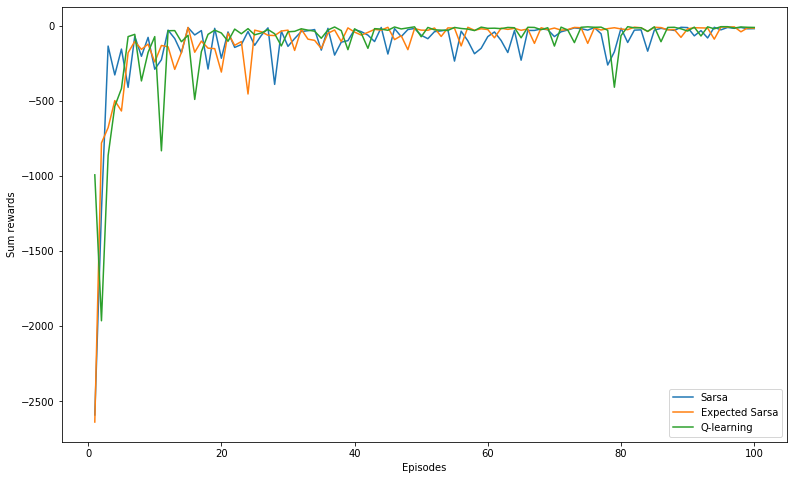

In [16]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(1, num_episodes+1), sum_rewards_sarsa, label='Sarsa')
plt.plot(np.arange(1, num_episodes+1), sum_rewards_expSarsa, label='Expected Sarsa')
plt.plot(np.arange(1, num_episodes+1), sum_rewards_qLearning, label='Q-learning')
plt.xlabel('Episodes')
plt.ylabel('Sum rewards')
plt.legend()
plt.show()